In [ ]:
import imageio
import matplotlib.pyplot as plt


from mlxtend.image import extract_face_landmarks

img = imageio.imread('/content/WIN_20220310_20_46_23_Pro.jpg')
landmarks = extract_face_landmarks(img)
print(landmarks.shape)
print('\n\nFirst 10 landmarks:\n', landmarks[:10])

(68, 2)


First 10 landmarks:
 [[241  95]
 [241 116]
 [244 137]
 [248 158]
 [255 178]
 [266 197]
 [281 211]
 [300 224]
 [321 227]
 [342 225]]


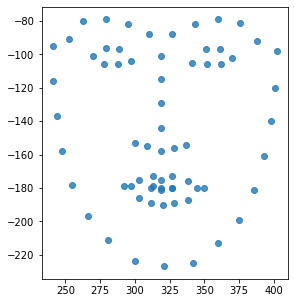

In [ ]:
fig = plt.figure(figsize=(15, 5))
#ax = fig.add_subplot(1, 3, 1)
#ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
#ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()

for p in landmarks:
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
    # note that the values -3 and +3 will make the landmarks
    # overlayed on the image 6 pixels wide; depending on the
    # resolution of the face image, you may want to change
    # this value

#ax.imshow(img2)
#plt.show()

In [ ]:
import math
dist = landmarks[16][0] - landmarks[0][0]
# Round the distance between Point[0] and Point[16] landmark
# on the x-axis to the nearest 100 values
# (i.e a distance 278 will be rounded to 300)
dist = int(math.ceil(dist / 100.0)) * 100

In [ ]:
glasses = cv2.imread("/content/pngfind.com-cartoon-sunglasses-png-2132915.png",-1)

In [ ]:
dw = dist
dh = int(dw * 0.50)
glassesResize = cv2.resize(glasses,(dw,dh))

In [ ]:
glassesOriginal = glassesResize[:,:,0:3]
glassesOriginal = cv2.cvtColor(glassesOriginal,cv2.COLOR_BGR2RGB)
maskGlasses = glassesResize[:,:,3]

319,101
61:161,219:419


Text(0.5, 1.0, " Region of Interest in Girl's image")

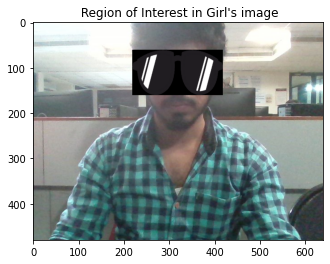

In [ ]:
import imdlib
midpointX, midpointY = landmarks[27]
print("{},{}".format(midpointX,midpointY))
y1 = midpointY - int(dh * 0.4)
y2 = y1 + dh
x1 = midpointX - int(dw / 2)
x2 = midpointX + int(dw / 2)
glassesGirl = img.copy()
print('{}:{},{}:{}'.format(y1,y2,x1,x2))
glassesGirl[y1:y2,x1:x2]=glassesOriginal
plt.imshow(glassesGirl)
plt.title(" Region of Interest in Girl's image")

In [ ]:
maskedGlassesImage = cv2.merge((maskGlasses,maskGlasses,maskGlasses))

In [ ]:
augGlassesMasked = cv2.bitwise_and(glassesOriginal,maskedGlassesImage)

In [ ]:
glassesGirlROI = img.copy()
glassesGirlROI = glassesGirlROI[y1:y2,x1:x2]
glassesGirlROIImage = cv2.bitwise_and(glassesGirlROI,cv2.bitwise_not(maskedGlassesImage))

In [ ]:
glassesGirlROIFinal = cv2.bitwise_or(glassesGirlROIImage , augGlassesMasked)

Text(0.5, 1.0, 'Image with sun-glasses')

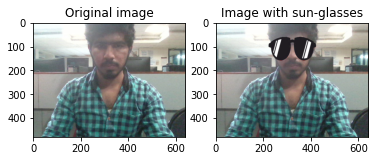

In [ ]:
glassesGirlfinal = img.copy()
glassesGirlfinal[y1:y2,x1:x2] = glassesGirlROIFinal
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(glassesGirlfinal)
ax1.set_title("Original image")
ax2.set_title("Image with sun-glasses")

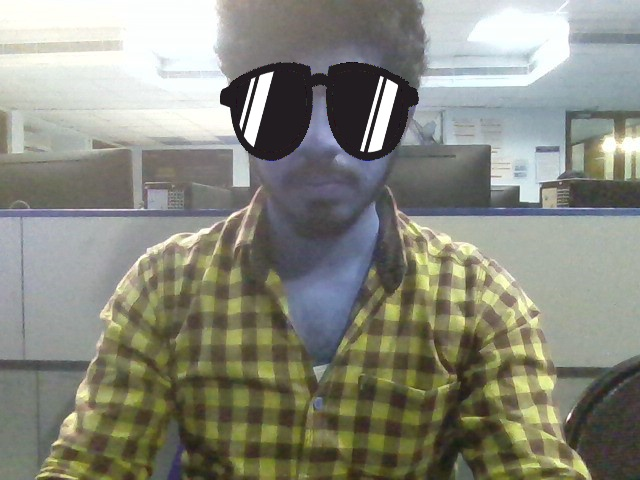

In [ ]:
import os
from google.colab.patches import cv2_imshow
x=os.path.split("/content/drive/MyDrive/train1/kiruthik/WIN_20220325_09_51_44_Pro.jpg")
cv2.imwrite(x[0]+"/augmentkiruthik.jpg",glassesGirlfinal)
img=cv2.imread("/content/drive/MyDrive/train1/kiruthik/augmentkiruthik.jpg")
cv2_imshow(img)

In [ ]:
!apt update
!apt install -y cmake
!pip install dlib
!pip install imdlib

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap